<a href="https://colab.research.google.com/github/KevinEnriquez96/Analogos/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Installation of libraries**

### **[LazyPredict](https://github.com/shankarpandala/lazypredict)**
Library to run many sklearn's binary classifiers with default parameters

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Imports, data obtention, and pre-processing**

In [ ]:
# Download and unzip 
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

# Data manipulation and EDA
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning classifers
import lazypredict
import pickle
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, balanced_accuracy_score, roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from matplotlib_venn import venn3
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize

# Google colab
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving datosfiltradosGamma.csv to datosfiltradosGamma.csv


In [ ]:
filename = "datosfiltradosGamma.csv" # this must match the name of the file you uploaded
df = pd.read_csv(io.StringIO(uploaded[filename].decode("utf-8")))

## **Feature matrices preparation**


### **Load molecular descriptors (features) - training and test datasets**

In [ ]:
# Select the NF and DCM patients
#gxData_cpm_lab_NFDCM = gxData_cpm_labeled[(gxData_cpm_labeled["etiology"] == "NF") | 
 #                                         (gxData_cpm_labeled["etiology"] == "DCM")]

In [ ]:
# Create the y label dataset
y = df['etiqueta'].copy()

# Encoding the target class label
# y = y.astype(str).apply(LabelEncoder().fit_transform)
y = y.map({"cuerdo": 0, "chumado": 1}).to_numpy()

In [ ]:
# Create the feature matrix by deleting the y column and the sample name
final_df = df.drop(['etiqueta'], axis=1)
X = final_df.to_numpy()

## **Exploratory Data Analysis**

### **Target variable**

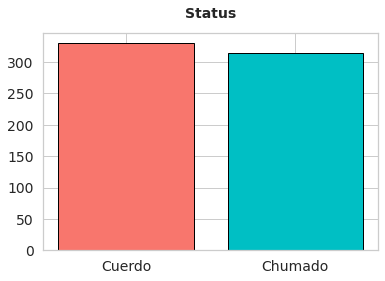

In [ ]:
# Data
n_cuerdo = (df["etiqueta"] == "cuerdo").sum()
n_chum = (df["etiqueta"] == "chumado").sum()


x_label = ['Cuerdo', 'Chumado']
y_label = [n_cuerdo, n_chum]

# Setup plot
fig, ax = plt.subplots()

# Make bar plot
p = ax.bar(x_label, y_label, color = ['#F8766D', '#00BFC4'], ec = 'black')

ax.set_title('Status', fontsize=14, fontweight='bold', pad=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## **Machine learning models**
First, we tested more than 30 ML binary classifiers using the [LazyPredict](https://github.com/shankarpandala/lazypredict) Python library. We chose the best model evaluating some performance metrics (e.g., accuracy, ROC AUC, F1 score, and Matthews Correlation Coefficient) on the test dataset. 

In [ ]:
# Run the ML classifiers with LazyPredict     
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state =42, stratify=y)

In [ ]:
# Define and build the Lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:00<00:00, 35.22it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,1.00,0.11
BaggingClassifier,1.00,1.00,1.00,1.00,1.00,0.03
SVC,1.00,1.00,1.00,1.00,1.00,0.01
DecisionTreeClassifier,1.00,1.00,1.00,1.00,1.00,0.01
RandomForestClassifier,1.00,1.00,1.00,1.00,1.00,0.16
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.00,0.11
KNeighborsClassifier,1.00,1.00,1.00,1.00,1.00,0.01
LabelPropagation,1.00,1.00,1.00,1.00,1.00,0.02
LabelSpreading,1.00,1.00,1.00,1.00,1.00,0.02


In [ ]:
# Export results as a csv
models.to_csv("Results_allMLclassifiers_alldiseases.csv")

[(0.0, 1.0)]

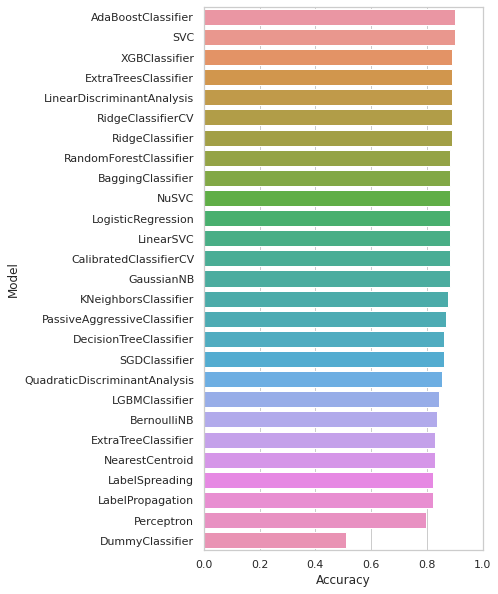

In [ ]:
# Plot of Accuracy
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="Accuracy", 
                 data=models)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

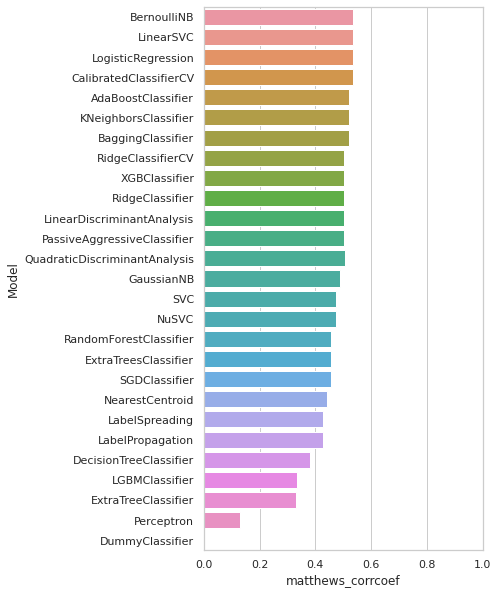

In [ ]:
# Plot of MCC
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, 
                 x="matthews_corrcoef", data=models)
ax.set(xlim=(0, 1))

---
We did not fine-tuned the hyperparameters of the best model because the performance metrics with the default parameters were very high, so hyperparameter tuning was not necessary.

### **Evaluation of the best model on the test dataset**
According to the summary tables presented above, there were some models with a perfect prediction capcity considering all of the performance metrics (values of 1 in the previous table). However, these methods are based on regression classifiers, which cannot show the feature importance of the model. So, we used the **RandomForestClassifier** that also have high performance metrics values and keep track of the feature importance (in this case, the gene expression values).

Thus, we trained this model again on the entire training dataset (without creating the validation partition) and evaluated it on the **test dataset**. 

In [ ]:
# Implementation of the best models
best_model1 = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=42))
best_model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))])

In [ ]:
# Function to calculate performance metrics
def performance_metrics(y, y_pred):
  acc = accuracy_score(y, y_pred)

  bal_acc = balanced_accuracy_score(y, y_pred)

  prec = precision_score(y, y_pred, average = 'weighted')

  recall = recall_score(y, y_pred,  average = 'weighted')

  f1score = f1_score(y, y_pred,  average = 'weighted')

  mcc = matthews_corrcoef(y, y_pred)

  results = [acc, bal_acc, prec, recall, f1score, mcc]

  return results

In [ ]:
# Dataset to store performance metrics
results_bestMLmodel = pd.DataFrame()

In [ ]:
# Predicting values with the best model on test and external datasets
y_test_pred = best_model1.predict(X_test)

# Calculate performance metrics of test and external datasets
results_bestMLmodel["Performance_metric"] = ['Accuracy', 'Balanced accuracy', 
                                                  'Precision', 'Recall', 'F1score', 'MCC']


results_bestMLmodel["Test_dataset"] = performance_metrics(y_test, y_test_pred)

In [ ]:
# Sort dataframe by performance metric
results_bestMLmodel.sort_values(by=['Performance_metric']).reset_index(drop=True)

,Performance_metric,Test_dataset
0,Accuracy,1.00
1,Balanced accuracy,1.00
2,F1score,1.00
3,MCC,1.00
4,Precision,1.00
5,Recall,1.00


### **Feature importance of the best model**

In [ ]:
# Retrieve feature importance from the best models
importance_bestmodel1 = pd.Series(best_model1[1].feature_importances_, name = 'Gini')

# Retrieve feature names
feature_names = pd.Series(final_df.columns, name = 'Feature')

In [ ]:
# Combine feature names and Gini values into a Dataframe
feat_import_bestmodel1 = pd.concat([feature_names, importance_bestmodel1], axis=1, names=['Feature', 'Gini'])

# Sort the dataframe by Gini in descending order
featimp_bestmodel1_sort = feat_import_bestmodel1.sort_values('Gini', ascending=False)

In [ ]:
# Export sorted feature importance datasets
featimp_bestmodel1_sort.to_csv("Important_genes_alldiseases_RandomForest_sorted.csv")

[(0.0, 1.0)]

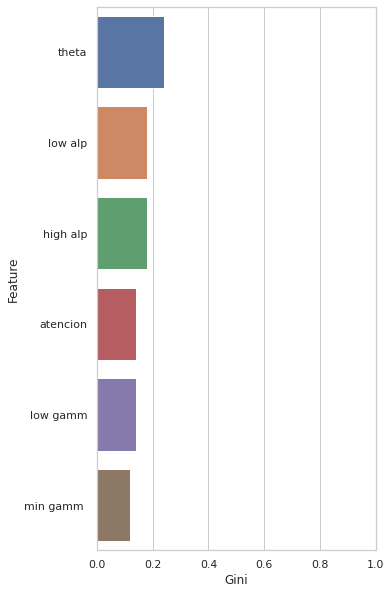

In [ ]:
# Plot of feature importance of the 3 algorithms
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(33, 15))
ax = sns.barplot(y = 'Feature', 
                 x = 'Gini', data=featimp_bestmodel1_sort.iloc[0:19])
ax.set(xlim=(0, 1))

The feature importance results show that most of the genes have low Gini impurity values, which means that all elements belong to a certain class and there are not highly important genes that helps to the classification task.

### **Save the best model into a file**

In [ ]:
# Define the output file's name
output_file = f'bestAdaboostClassifier.bin'
output_file

'bestAdaboostClassifier.bin'

In [ ]:
# Export the binary file of the best model
with open(output_file, "wb") as f_out:
    pickle.dump(best_model1[1], f_out)

## **Import the best model**

In [ ]:
model_file = 'bestAdaboostClassifier.bin'

In [ ]:
with open(model_file, 'rb') as f_in:
        model = pickle.load(f_in)

## **Make predictions**

In [ ]:
test = pd.DataFrame(final_df.loc[600, :]).T

In [ ]:
test

,atencion,theta,low alp,high alp,low gamm,min gamm
600,43.67,30846.00,26911.05,32391.66,30992.25,20663.55


In [ ]:
# Make the predictions
model.predict(test)

array([1])

In [ ]:
df

,atencion,theta,low alp,high alp,low gamm,min gamm,etiqueta
0,25.24,20107.61,14351.27,5571.25,1479.72,1107.37,cuerdo
1,46.18,28078.41,17450.88,7413.46,2048.06,1566.24,cuerdo
2,62.83,33886.27,19632.24,8937.07,2473.98,1923.16,cuerdo
3,75.62,37772.22,20998.60,10169.29,2772.35,2187.21,cuerdo
4,84.95,39977.29,21653.22,11137.34,2958.04,2367.45,cuerdo
...,...,...,...,...,...,...,...
640,22.16,43075.35,28425.71,17249.68,23033.57,20513.56,chumado
641,23.43,38456.04,26364.62,15594.31,23028.99,19886.32,chumado
642,24.44,31868.22,23227.48,13525.23,22225.96,18603.22,chumado
643,25.08,23078.77,18896.48,11015.37,20480.56,16572.56,chumado


---